In [1]:
import numpy as np
import matplotlib.pyplot as plt

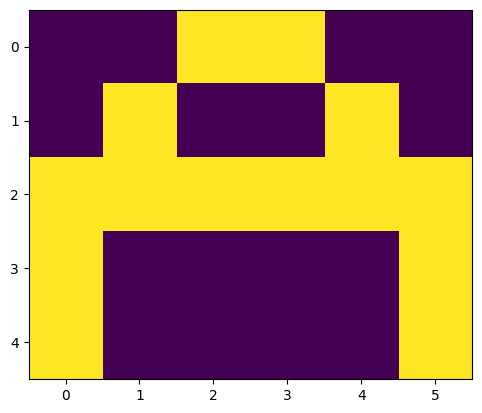

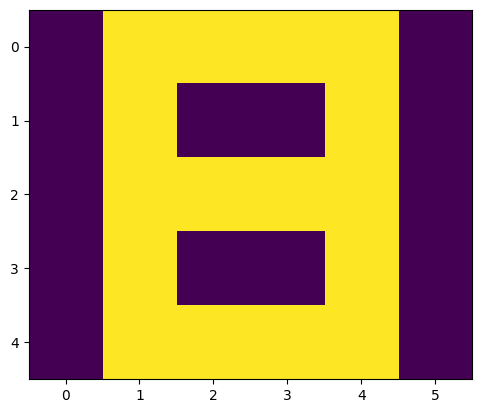

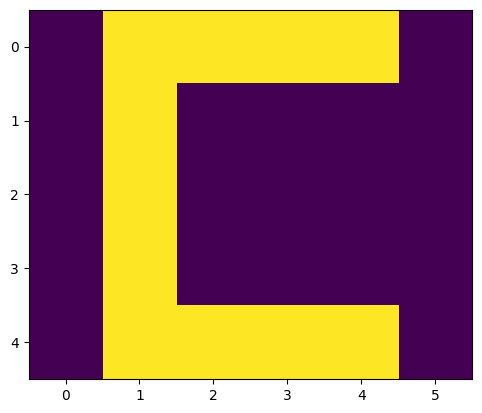

In [2]:
# Creating data set   
# A 
a = [0, 0, 1, 1, 0, 0, 
   0, 1, 0, 0, 1, 0, 
   1, 1, 1, 1, 1, 1, 
   1, 0, 0, 0, 0, 1, 
   1, 0, 0, 0, 0, 1] 
   
# B 
b =[0, 1, 1, 1, 1, 0, 
   0, 1, 0, 0, 1, 0, 
   0, 1, 1, 1, 1, 0, 
   0, 1, 0, 0, 1, 0, 
   0, 1, 1, 1, 1, 0] 
# C 
c =[0, 1, 1, 1, 1, 0, 
   0, 1, 0, 0, 0, 0, 
   0, 1, 0, 0, 0, 0, 
   0, 1, 0, 0, 0, 0, 
   0, 1, 1, 1, 1, 0] 
  
# Creating labels 
y =[[1, 0, 0], 
   [0, 1, 0], 
   [0, 0, 1]] 

# Visualizing the data, plotting A 
plt.imshow(np.array(a).reshape(5,6)) 
plt.show()
#plt.savefig('output/legend1.png')

# Visualizing the data, plotting B
plt.imshow(np.array(b).reshape(5, 6)) 
plt.show()
#plt.savefig('output/legend2.png')

# Visualizing the data, plotting C
plt.imshow(np.array(c).reshape(5, 6)) 
plt.show()
#plt.savefig('output/legend3.png')


In [3]:
# Converting data into numpy array 
x = np.array([a, b, c]) 
# Labels are also converted into NumPy array 
y = np.array(y) 

# Printing the variables to help in visualization
print("x:\n", x)
print("\ny:\n", y)

x:
 [[0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1]
 [0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0]
 [0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0]]

y:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [4]:
x.shape

(3, 30)

In [5]:
y.shape

(3, 3)

In [6]:
np.random.seed(42) # seed function to generate the same random value
n_x = 30
n_h1 = 5
n_h2 = 4
n_y = 3
w1 = np.random.randn(n_x, n_h1)
w2 = np.random.randn(n_h1, n_h2)
w3 = np.random.randn(n_h2, n_y)
b1 = np.zeros((1, n_h1))
b2 = np.zeros((1, n_h2))
b3 = np.zeros((1, n_y))
learning_rate = 0.01
epochs = 1000

print("\nFeatures:\n", x)
print("\nLabels:\n", y)
print("\n Number of nodes in the input layer:", n_x)
print("\n Number of nodes in the first hidden layer:", n_h1)
print("\n Number of nodes in the second hidden layer:", n_h2)
print("\n Shape of weights in the first hidden layer:", w1.shape)
print("\n Shape of weights in the second hidden layer:", w2.shape)
print("\n Shape of bias in the first hidden layer:", b1.shape)
print("\n Shape of bias in the second hidden layer:", b2.shape)
print("\n Learning rate:", learning_rate)
print("\n Epochs:", epochs)


Features:
 [[0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1]
 [0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0]
 [0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0]]

Labels:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]

 Number of nodes in the input layer: 30

 Number of nodes in the first hidden layer: 5

 Number of nodes in the second hidden layer: 4

 Shape of weights in the first hidden layer: (30, 5)

 Shape of weights in the second hidden layer: (5, 4)

 Shape of bias in the first hidden layer: (1, 5)

 Shape of bias in the second hidden layer: (1, 4)

 Learning rate: 0.01

 Epochs: 1000


In [7]:
#print("w1 = ", w1)
#print('Shape of w1', w1.shape)
#print("b1 = ", b1)
#print("*********************")    
#print("w2 = ", w2)
#print("b2 = ", b2)
#print("**********************")      
#print("w3 = ", w3)
#print("b3 = ", b3)

In [8]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x)/np.sum(np.exp(x),axis=0)

def sigmoid(x):
    return 1/(1+ np.exp(x))

def forward_propagation(x, w1, w2, w3, b1, b2, b3):
    """ Compute forward propagation algorithm with 2 hidden layers"""
    n_h1 = np.dot(x, w1) + b1
    out_h1 = sigmoid(n_h1)
    n_h2 = np.dot(out_h1, w2) + b2
    out_h2 = sigmoid(n_h2)
    n_y = np.dot(out_h2, w3)
    out_y = softmax(n_y)
    return out_h1, out_h2, out_y

def backpropagation(y, out_y, out_h2, out_h1, w3, w2, x):
    """Compute the backforward propagation algorithm for the 3-layerd
    neurak network and returns the gradients of weights and biases"""
    
    # Back propagating error from output to second hidden layer
    l3_error = out_y - y  # Calculating error at layer 3
    dw3 = np.dot(out_h2.T, l3_error) # Change in weights at layer 3
    db3 = np.sum(l3_error, axis=0, keepdims = True) # Change in bias at layer 3
    
    # Back propagating error from second hidden layer to first hidden layer
    dh_2 = np.dot(w3, l3_error)
    l2_error = np.multiply(dh_2.T, out_h2*(1-out_h2)) # Calculate error at layer 2
    dw2 = np.dot(out_h1.T, l2_error) # Change in weights at layer 2
    db2 = np.sum(l2_error, axis = 0, keepdims = True) # Change in bias at layer 2
    
    # Back propagating error from first hidden layer to input layer
    dh_1 = np.dot(w2, l2_error.T)
    l1_error = np.multiply(dh_1.T, out_h1 *(1-out_h1)) # Calculating error at layer 1
    dw1 = np.dot(x.T, l1_error) # Change in weights at layer 1
    db1 = np.sum(l1_error, axis = 0, keepdims = True) # Change in bias at layer 1
    
    return dw1, db1, dw2, db2, dw3, db3


def update_parameters(w1, dw1, b1, db1, w2, dw2, b2, db2, w3, dw3, b3, db3, learning_rate):
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    
    w3 = w3 - learning_rate * dw3
    b3 = b3 - learning_rate * db3
    return w1, b1, w2, b2, w3, b3

def calculate_error(y, y_predicted):
    losses = np.sum(-y * np.log(y_predicted) - (1 - y)* np.log(1-y_predicted))
    return losses

def train(x, y, w1, w2, w3, b1, b2, b3, epochs, learning_rate):
    """Train the 3 layered neural network"""
    losses = np.zeros((epochs, 1))
    for i in range(epochs):
        out_h1, out_h2, out_y = forward_propagation(x, w1, w2, w3, b1, b2, b3)
        losses [i, 0] = calculate_error(y, out_y)
        dw1, db1, dw2, db2, dw3, db3 = backpropagation(y, out_y, out_h2, out_h1, w3, w2, x)
        w1, b1, w2, b2, w3, b3 = update_parameters(w1, dw1, b1, db1, w2, dw2, b2, db2, w3, dw3, b3, db3, learning_rate)

    return w1, b1, w2, b2, w3, b3, losses 

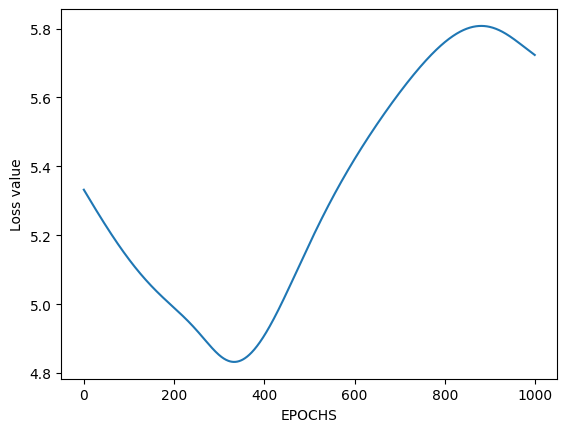

In [9]:

# Train the neural network
w1, b1, w2, b2, w3, b3, losses = train(x, y, w1, w2, w3, b1, b2, b3, epochs, learning_rate)
# Evaluating the performance 
plt.figure() 
plt.plot(losses) 
plt.xlabel("EPOCHS") 
plt.ylabel("Loss value") 
plt.show() 


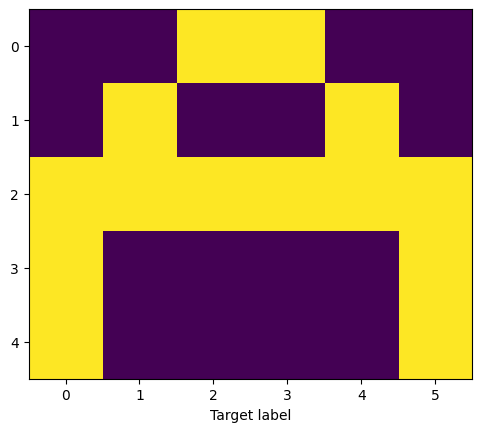

softmax output: [[1. 1. 1.]]
Highest value of index: 0


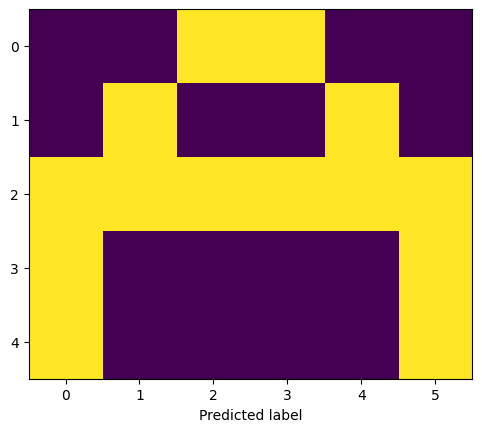

In [10]:
A = x[0] # pixel values for letter A
B = x[1] # pixel values for letter B
C = x[2] # pixel values for letter C

def predict(letter, x):
    """Computes predictions on the trained weights and bias"""
    out_h1, out_h2, out_y = forward_propagation(letter, w1, w2, w3, b1, b2, b3)
    print("softmax output:", out_y)
    prediction = np.where(out_y == np.amax(out_y)) # returns the maximum value of array
    print("Highest value of index:", prediction[1][0]) 
    # plot the predicted label
    plt.xlabel("Predicted label") 
    plt.imshow(x[prediction[1][0]].reshape(5, 6)) 
    plt.show()
    

letter = A
# printing the target label
plt.imshow(letter.reshape(5, 6)) 
plt.xlabel("Target label") 
plt.show() 

predict(letter, x)   

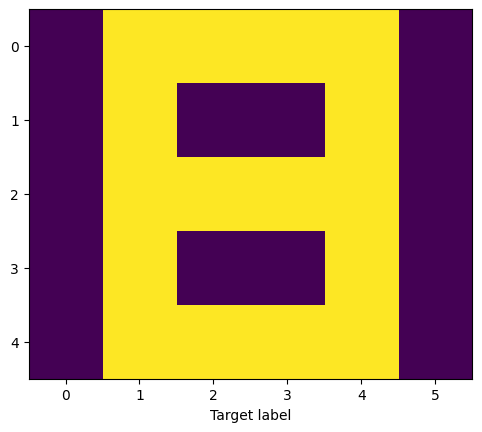

softmax output: [[1. 1. 1.]]
Highest value of index: 0


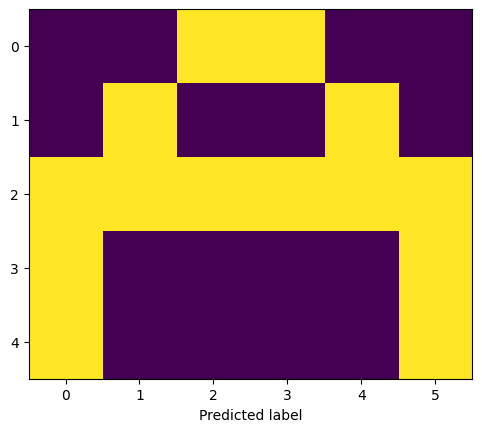

In [11]:
letter = B
# printing the target label
plt.imshow(letter.reshape(5, 6)) 
plt.xlabel("Target label") 
plt.show() 

predict(letter, x) 

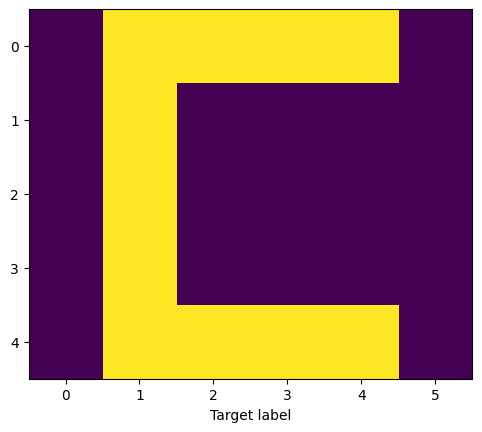

softmax output: [[1. 1. 1.]]
Highest value of index: 0


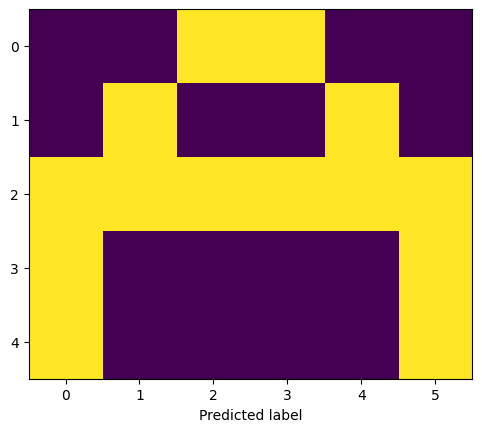

In [12]:
letter = C
# printing the target label
plt.imshow(letter.reshape(5, 6)) 
plt.xlabel("Target label") 
plt.show() 

predict(letter, x) 

In [13]:
#a, b, c = forward_propagation(x, w1, w2, w3, b1, b2, b3)

In [14]:
#print("First Hidden layer output:\n", a)
#print("Second Hidden layer output:\n", b)
#print("Output layer:\n", c)

In [15]:
#out_h1, out_h2, out_y = forward_propagation(x, w1, w2, w3, b1, b2, b3)
#dw1, db1, dw2, db2, dw3, db3 = backpropagation(y, out_y, out_h2, out_h1, w3, w2, x)
#print("dW1:\n",dw1, "\ndw2:\n", dw2, "\ndW3:\n", dw3, "\ndb1:\n", db1, "\ndb2:\n", db2, "\ndb3:\n", db3)